In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_1_until_3.csv')
retail_data2 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_4_until_6.csv')
retail_data3 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_7_until_9.csv')
retail_data4 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/LO4/retail_data_from_10_until_12.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')

# Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())

# Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)

# Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0])

# Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())

# Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')

# Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0)]
print('\nitem_price < 0 atau total_price < 0:\n', cek)

# Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
    retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]
    
# Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)

# Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
    retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

# Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
# Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
# Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
# Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


PENGECEKAN DATA


   Unnamed: 0  order_id  order_date  customer_id             city  \
0           0   1612339  2019-01-01        18055  Jakarta Selatan   
1           1   1612339  2019-01-01        18055  Jakarta Selatan   
2           2   1612339  2019-01-01        18055  Jakarta Selatan   
3           3   1612339  2019-01-01        18055  Jakarta Selatan   
4           4   1612339  2019-01-01        18055  Jakarta Selatan   

      province product_id    brand  quantity  item_price  total_price  
0  DKI Jakarta      P0648  BRAND_C         4     1934000      7736000  
1  DKI Jakarta      P3826  BRAND_V         8      604000      4832000  
2  DKI Jakarta      P1508  BRAND_G        12      747000      8964000  
3  DKI Jakarta      P0520  BRAND_B        12      450000      5400000  
4  DKI Jakarta      P1513  BRAND_G         3     1500000      4500000  
Kolom retail_data1: Index(['Unnamed: 0', 'order_id', 'order_date', 'customer_id', 'city',
       'province', 'product_id', 'brand', 'qu

In [3]:
# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
# Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
'order_id': 'nunique',
'customer_id': 'nunique',
'product_id': 'nunique',
'brand': 'nunique',
'total_price': sum
})
# Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['DKI Jakarta' 'Jawa Barat' 'Jawa Timur' 'Yogyakarta' 'Jawa Tengah']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     58        50      590     25  6218886000
           Jawa Barat      17        14      246     21  1458207000
           Jawa Tengah      8         7       67     18   968273000
           Jawa Timur       6         6       69     17   901676000
           Yogyakarta      12        12      238     23  1509057000

unstack_city_province (5 dat

In [4]:
# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         34.0        11.0          4.0         6.0         7.0
2019-01-02         58.0        17.0          8.0         6.0        12.0
2019-01-03         43.0        13.0          8.0         8.0        10.0
2019-01-04         39.0         9.0         11.0         2.0         3.0
2019-01-06         22.0         9.0          3.0         4.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    27.222222   10.500000     5.111111    3.500000    4.555556
2019-02-28    19.083333    7.458333     3.250000    3.208333    2.833333
2019-03-31    18.576923    6.615385     3.615385    3.192308    3.038462
2019-04-30    22.923077    8.000000     4.038462    3

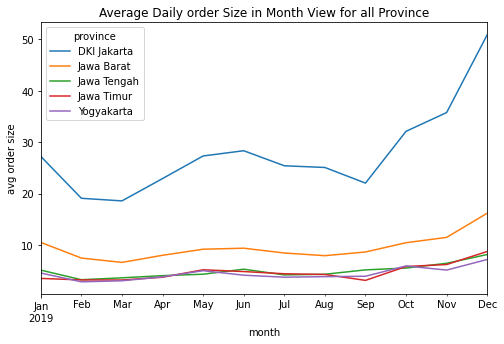

In [5]:
import matplotlib.pyplot as plt

# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

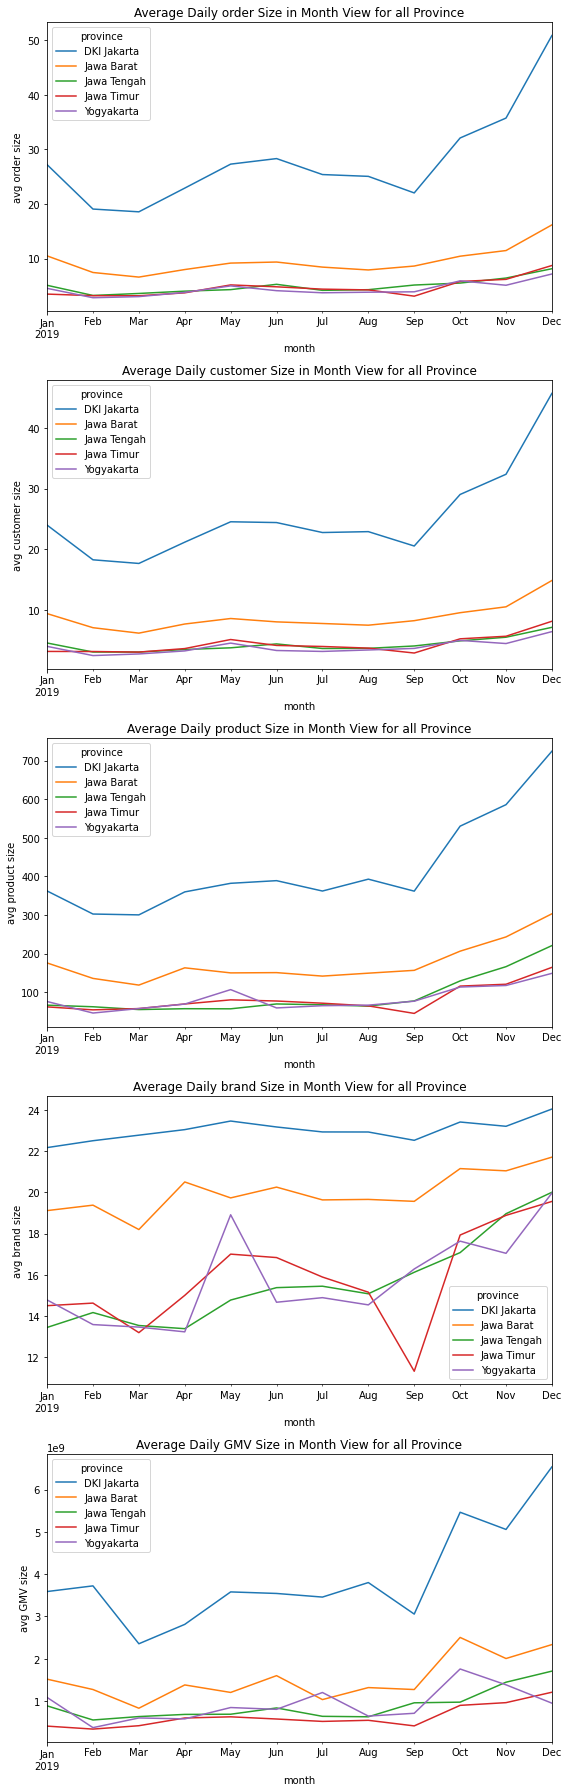

In [9]:
import matplotlib.pyplot as plt

# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
    title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
    ax = axes[i])
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()